# CS3033/CS6405 - Data Mining - Second Assignment

### Submission

This assignment is **due on 14/04/24 at 23:59**. You should submit a single .ipnyb file with your python code and analysis electronically via Canvas.
Please note that this assignment will account for 25 Marks of your module grade.

### Declaration

By submitting this assignment. I agree to the following:

<font color="red">“I have read and understand the UCC academic policy on plagiarism, and agree to the requirements set out thereby in relation to plagiarism and referencing. I confirm that I have referenced and acknowledged properly all sources used in the preparation of this assignment.
I declare that this assignment is entirely my own work based on my personal study. I further declare that I have not engaged the services of another to either assist me in, or complete this assignment”</font>

### Objective

The Boolean satisfiability (SAT) problem consists in determining whether a Boolean formula is satisfiable or not. This problem is one of the most widely studied combinatorial problems in computer science. It is the classic NP-complete problem. Over the past number of decades, a significant amount of research work has focused on solving SAT problems with both complete and incomplete solvers.

An extended version of the problem is Model Counting (#SAT). In #SAT the solver needs to compute the number of solutions of a Boolean formula. A wide variety of solvers have been designed to tackle this problem.

In this project, we want to create an Algorithm Selection (AS) approach to Model Counting. For each #SAT instance, there is a specific solver that works better than the others, the goal of your machine learing approach is to classify it.

In AS we represent #SAT problems with a vector of 72 features with general information about the problem, e.g., number of variables, number of clauses, etc. There is no need to understand the features to be able to complete the assignment. For each instance, there is a 'label' column representing the name of the optimal solver.


The original dataset is available at:
https://github.com/andvise/DM_Assignment/blob/main/train_data.csv



## Data Preparation

In [36]:
import pandas as pd

df = pd.read_csv("https://github.com/andvise/DM_Assignment/blob/main/train_data.csv?raw=true")
df

,c,v,clauses_vars_ratio,vars_clauses_ratio,vcg_var_mean,vcg_var_coeff,vcg_var_min,vcg_var_max,vcg_var_entropy,vcg_clause_mean,...,gsat_FirstLocalMinStep_CoeffVariance,gsat_FirstLocalMinStep_Median,gsat_FirstLocalMinStep_Q.10,gsat_FirstLocalMinStep_Q.90,gsat_BestAvgImprovement_Mean,gsat_BestAvgImprovement_CoeffVariance,gsat_FirstLocalMinRatio_Mean,gsat_FirstLocalMinRatio_CoeffVariance,gsat_EstACL_Mean,label
0,681.0,238.0,2.861345,0.349486,0.011143,0.905300,0.005874,0.111601,1.880038,0.011143,...,0.210148,50.0,42.0,57.0,0.954568,0.591296,1.141656,3.197217,9.240515e+09,gpmc
1,368.0,140.0,2.628571,0.380435,0.018012,0.510753,0.005435,0.054348,1.851609,0.018012,...,0.124438,34.0,29.0,40.0,1.693036,0.244951,0.969015,0.029930,5.401642e+03,d4
2,1935.0,1920.0,1.007812,0.992248,0.001760,1.723720,0.000000,0.012403,1.280404,0.001760,...,0.066708,102.0,94.0,111.0,0.398129,0.824694,0.935730,0.092714,3.561823e+04,gpmc
3,3452.0,2821.0,1.223680,0.817207,0.000968,1.436774,0.000290,0.006083,1.192878,0.000968,...,0.053628,192.0,179.0,205.0,0.247528,0.702251,0.923327,0.026977,1.268929e+05,gpmc
4,694.0,294.0,2.360544,0.423631,0.007656,0.493513,0.002882,0.040346,1.776102,0.007656,...,0.086841,72.0,64.0,80.0,0.822829,0.209989,0.855568,0.045802,1.647598e+04,d4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,949.0,351.0,2.703704,0.369863,0.006701,1.151888,0.002012,0.063380,1.857919,0.006701,...,0.079108,81.0,73.0,89.0,0.781888,0.256505,0.837929,0.066291,1.643030e+04,sharpsat
1332,1450.0,608.0,2.384868,0.419310,0.004427,1.552830,0.002408,0.161349,1.659495,0.004427,...,0.062664,136.0,125.0,147.0,0.776364,0.174557,0.855907,0.031698,3.816192e+04,gpmc
1333,250.0,100.0,2.500000,0.400000,0.026000,0.555766,0.000000,0.096000,1.751533,0.026000,...,0.140708,26.0,21.0,30.0,2.093007,0.117640,1.000000,0.000000,3.168220e+03,gpmc
1334,4949.0,3422.0,1.446230,0.691453,0.000764,0.770643,0.000202,0.004445,1.835041,0.000764,...,0.032571,461.0,441.0,479.0,0.202805,0.220101,0.856952,0.016884,6.236767e+05,gpmc


In [37]:
# Label counts
df['label'].value_counts()


label
gpmc        921
d4          168
ganak       140
addmc        55
sharpsat     52
Name: count, dtype: int64

# Tasks

## Basic models and evaluation (5 Marks)

Using Scikit-learn, train and evaluate a k-NN classifier using 70% of the dataset from training and 30% for testing. For this part of the project, we are not interested in optimising the parameters; we just want to get an idea of the dataset.

In [38]:
from sklearn import datasets
from sklearn import neighbors
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score



import warnings
warnings.filterwarnings("ignore")

In [39]:
#Features and target variables
labels=df['label']
features=df.iloc[:,:-1]
features.shape

(1336, 72)

In [40]:
#Check fro any null values
null_values = df.isnull().any().any()
print(null_values)

False


The Knn Classifier accuracy is: 71.0
--------Misclassification table------------
col_0     addmc  d4  ganak  gpmc
label                           
addmc        14   1      0     4
d4            0  17      1    34
ganak         0   5      9    25
gpmc          2  16     14   243
sharpsat      0   6      4     6


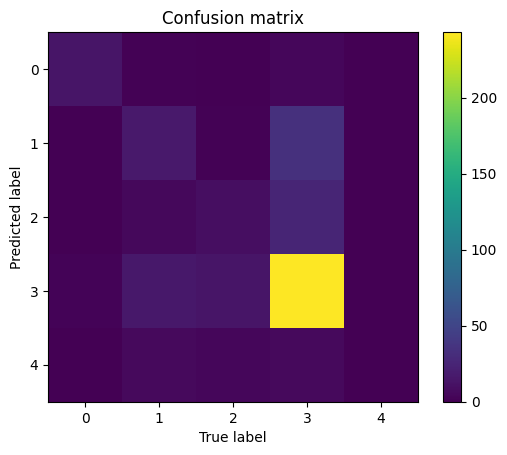

In [41]:
"""KNN classification with 5 nearest neighbors """
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)

#Train and Test Split (70-30)split
train_features, test_features, train_labels, test_labels= model_selection.train_test_split(features, labels,test_size=0.3, random_state=0)

#Train the model using train features and train labels
knn.fit(train_features,train_labels)

#Test the model using 30% of test features
results=knn.predict(test_features)

#calculate the accuracy based on the predicted labels and test labels
print("The Knn Classifier accuracy is:",round(metrics.accuracy_score(results,test_labels ),2)*100)

#plot the confusion matrix to see which all are misclassified.
print("--------Misclassification table------------")
print(pd.crosstab(test_labels,results))
confusion_m = confusion_matrix(test_labels, results)

# Plotting confusion matrix
plt.imshow(confusion_m)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()


## Robust evaluation (10 Marks)

In this section, we are interested in more rigorous techniques by implementing more sophisticated methods. Do your best to improve the k-NN classifier performances on this dataset.

For instance, you could consider:
* Hold-out and cross-validation.
* Hyper-parameter tuning.
* Feature selection.
* Feature normalisation.
* Etc.



Your report should provide concrete information about your reasoning, everything should be well-explained.

The key to geting good marks is to show that you evaluated different methods and that you correctly selected the configuration.

In [ ]:
"""Each features are checked for Outliers so that it won't influence the model to perform badly.
The cutoff for outlier is 3. Intially the z-score of a feature is calculated and compared it with cutoff.
Below rows shows each features outliers ""

In [42]:
# Evaluating Z-scores
mean_val=features.mean()
std_val=features.std()
z_scores = (features - mean_val)/std_val
# cutoff to consider the datapoint as outlier is
cutoff = 3
# Identify outliers for each feature
outliers = (np.abs(z_scores) > cutoff).any(axis=1)

print("Rows with outliers:")
print(features[outliers])

Rows with outliers:
             c        v  clauses_vars_ratio  vars_clauses_ratio  vcg_var_mean  \
0        681.0    238.0            2.861345            0.349486      0.011143   
3       3452.0   2821.0            1.223680            0.817207      0.000968   
5     109882.0   9603.0           11.442466            0.087394      0.000023   
12      3927.0   1249.0            3.144115            0.318054      0.002154   
13     44404.0  17842.0            2.488734            0.401811      0.000128   
...        ...      ...                 ...                 ...           ...   
1326    8460.0   2669.0            3.169726            0.315485      0.000976   
1328    1425.0   1212.0            1.175743            0.850526      0.002960   
1330    2849.0   1111.0            2.564356            0.389961      0.002035   
1333     250.0    100.0            2.500000            0.400000      0.026000   
1334    4949.0   3422.0            1.446230            0.691453      0.000764   

      v

Reference: To evaluate Outliers
https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/

**FEATURE MINMAX WITH PCA**

In [43]:
#using standard scalar and applying to both train and test features
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

pca = PCA(n_components=21)
train_features = pca.fit_transform(train_features)
test_features = pca.transform(test_features)

print("Training set size ", train_features.shape)

knn = neighbors.KNeighborsClassifier()
parameters = {'n_neighbors': [1, 3, 5, 7, 11]}

clf = model_selection.GridSearchCV(knn, parameters)
clf.fit( train_features, train_labels)

print("The best classifier is:", clf.best_estimator_)
print("Its accuracy is:",clf.best_score_*100)
print("Its parameters are:",clf.best_params_)

Training set size  (935, 21)
The best classifier is: KNeighborsClassifier()
Its accuracy is: 73.15508021390373
Its parameters are: {'n_neighbors': 5}


**FEATURE NORMALIZING WITH PCA**

In [44]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

pca = PCA(n_components=21)
train_features = pca.fit_transform(train_features)
test_features = pca.transform(test_features)

knn = neighbors.KNeighborsClassifier()
parameters = {'n_neighbors': [1, 3, 5, 7, 11]}

clf = model_selection.GridSearchCV(knn, parameters)
clf.fit( train_features, train_labels)
print("The best classifier is:", clf.best_estimator_)
print("Its accuracy is:",clf.best_score_*100)
print("Its parameters are:",clf.best_params_)

The best classifier is: KNeighborsClassifier(n_neighbors=3)
Its accuracy is: 73.475935828877
Its parameters are: {'n_neighbors': 3}


**Since the dataset has one or more outliers in more than one features the selection of scaling is important.**
**MinMax Scaling scales each features in the range of 0 and 1 and if the features are having outliers they are highly influential.**
**Standard Scaling scales each feature to having mean of 0 and standard deviation of 1. They are less likely to infuence to the outliers.**

**Above we have imlemented both MinMax and standard scaling to check the model performance for both the scalings and the result was quite similar for both.**

**Therefore I select standard scaling for this project**

**FEATURE REDUCTION**

In [45]:
train_features, test_features, train_labels, test_labels= model_selection.train_test_split(features, labels,test_size=0.3, random_state=0)

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

#using all component for PCA( 72 features)
pca = PCA(n_components=72)
pca.fit_transform(train_features)
#print(pca.singular_values_)

threshold_90=90
variability=np.where(np.cumsum(pca.explained_variance_ratio_*100)>threshold_90)[0]
print("PCA having variance more than 90% = ", variability[0])

threshold_95=95
variability=np.where(np.cumsum(pca.explained_variance_ratio_*100)>threshold_95)[0]
print("PCA having variance more than 95% = ", variability[0])

threshold_98=98
variability=np.where(np.cumsum(pca.explained_variance_ratio_*100)>threshold_98)[0]
print("PCA having variance more than 98% = ", variability[0])


PCA having variance more than 90% =  15
PCA having variance more than 95% =  21
PCA having variance more than 98% =  29


**The PCA having variance more than 98% is just 29 component out 72. The is basically dimension reduction method  which help us to identify which components collectively capture a portion of data variability. The Cut off range from 90%-95%/98% so we can set any component from the range 15-29**

**PIPELINE WITH CROSS-VALIDATION**

In [46]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=0)

# Define the pipeline
pipe_lr = Pipeline([('scl', StandardScaler()), ('dr', PCA(25)),('clf', KNeighborsClassifier(5))])
pipe_lr_cv = Pipeline([('scl', StandardScaler()),('clf', KNeighborsClassifier(5))])
# Perform cross-validation
results = cross_val_score(pipe_lr, train_features, train_labels, cv=10)
print("10 fold CV of KNN with PCA Train Accuracy for is:",round(results.mean()*100,2))


10 fold CV of KNN with PCA Train Accuracy for is: 71.66


In [47]:
pipe_lr.fit(train_features,train_labels)
predictedResults = pipe_lr.predict(test_features)

metrics.accuracy_score(predictedResults, test_labels)
print('Test Accuracy with PCA:',round( pipe_lr.score(test_features, test_labels)*100,2))

Test Accuracy with PCA: 72.07


**Performed Pipeline method which helps to evaluate model performance. since its a preprocessing technique this perform scaling, dimension reduction and KNN with n=5 as nearest neighbor and then pass it on for cross validation, the 10 Cross validated train set is fitted and then the model is predicted.**

**HOLD-OUT CROSS VALIDATION**

In [48]:
features_hold = df.iloc[:-136,:-1]
labels_hold = labels[:-136]

feature_feat=df.iloc[1200:,:-1]
labels_feat=labels[1200:]

train_f, test_f, train_l, test_l = train_test_split(features_hold, labels_hold, test_size=0.3, random_state=0)


# Define the pipeline with PCA and KNN
pipe_lr = Pipeline([('scl', StandardScaler()), ('dr', PCA(25)), ('clf', KNeighborsClassifier(5))])

results_90data = cross_val_score(pipe_lr, train_f, train_l, cv=10)
print("10 fold Cross validation Train Accuracy for 90% of data is:",round(results_90data.mean()*100,2))
# Fit the model with PCA
pipe_lr.fit(train_f, train_l)
predictedResults = pipe_lr.predict(test_f)
test_accuracy_pca = metrics.accuracy_score(predictedResults, test_l)
print('Test Accuracy :', round(test_accuracy_pca * 100,2))

#Hold out prediction
results_10data = cross_val_score(pipe_lr, feature_feat, labels_feat, cv=10)
print("10 fold Cross validation Train Accuracy for 10% of data is:",round(results_10data.mean()*100,2))
HoldpredictedResults = pipe_lr.predict(feature_feat)
test_accuracy_pca = metrics.accuracy_score(HoldpredictedResults, labels_feat)
print('Hold Out Test Accuracy :', round(test_accuracy_pca * 100,2))


10 fold Cross validation Train Accuracy for 90% of data is: 73.33
Test Accuracy : 68.06
10 fold Cross validation Train Accuracy for 10% of data is: 68.24
Hold Out Test Accuracy : 75.0


**I have performed Hold out Cross validation by spliting the data into 90-10% initial and used 90% of data for train and test split (70%-30%) and did a crossvalidation for these dataset. Later for prediction I have used 10% of untouched data and found out the that Hold out is possible only when there is large dataset.**
**since the train-test accuracy result are not that much of difference we cannot say its overfitting to get better judgement we need more dataset.**

**HYPER-PARAMETER TUNING**

In [49]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=0)

pipe_hp = Pipeline([('scl', StandardScaler()), ('dr', PCA()), ('clf', KNeighborsClassifier())])

parameters={"dr__n_components":[15,20,25,30,35],
            "clf__n_neighbors": [3, 5, 7, 9, 11],
            "clf__weights": ['uniform', 'distance']}

#performing grid search
grid=GridSearchCV(pipe_hp,parameters,scoring='accuracy',cv=10)
grid.fit(train_features,train_labels)

#finding best parameter and best scores
print("Best Parameters: ",grid.best_params_)
print("Best Score: ",grid.best_score_*100)

pipe_hp.set_params(**grid.best_params_)
pipe_hp.fit(train_features,train_labels)
train_accuracy = accuracy_score(train_labels, pipe_hp.predict(train_features)) * 100

print("Accuracy with best parameters : ",pipe_hp.score(test_features, test_labels)*100)

Best Parameters:  {'clf__n_neighbors': 11, 'clf__weights': 'distance', 'dr__n_components': 35}
Best Score:  75.28711965225348
Accuracy with best parameters :  74.06483790523691


 **Hyper-parameter tuning using Grid search along with cross validation provides optimal set of hyperparameter for KNN Classifier.** **It is performed by exploring hyper space and selecting best parameters and accuracy score by evaluating each set of hyperparameters and performs crossvalidation for each set and calculate best score out of that particular models.**

## New classifier (10 Marks)

Replicate the previous task for a classifier different than K-NN and decision trees. Briefly describe your choice.
Try to create the best model for the given dataset.






# **Naive Bayes Classifer**

In [50]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=0)


pipe_grad_pca = Pipeline([('scl', StandardScaler()), ('dr', PCA(25)), ('clf', GaussianNB())])

Boost_cv_train = cross_val_score(pipe_grad_pca, train_features, train_labels.values,cv=10)
print('Naives Bayes with PCA Train accuracy for 10 fold CV :',np.mean(Boost_cv_train)*100)
print()

pipe_grad_pca.fit(train_features,train_labels.values)
print("Accuracy Naives Bayes with PCA:",pipe_grad_pca.score(test_features,test_labels)*100)
print()



Naives Bayes with PCA Train accuracy for 10 fold CV : 54.751773049645394

Accuracy Naives Bayes with PCA: 54.3640897755611



# **Gradient Boosting Classifier**

In [57]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=0)


pipe_grad_pca = Pipeline([('scl', StandardScaler()), ('dr', PCA(25)), ('clf', GradientBoostingClassifier())])

Boost_cv_train = cross_val_score(pipe_grad_pca, train_features, train_labels.values,cv=10)
print('Gradient Boosting with PCA Train accuracy for 10 fold CV :',np.mean(Boost_cv_train)*100)
print()

pipe_grad_pca.fit(train_features,train_labels.values)
print("Accuracy Gradient Boosting with PCA:",pipe_grad_pca.score(test_features,test_labels)*100)
print()



Gradient Boosting with PCA Train accuracy for 10 fold CV : 66.8091168091168

Accuracy Gradient Boosting with PCA: 71.64179104477611



# **Support Vector Machine**

In [58]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=0)

pipe_grad_pca = Pipeline([('scl', StandardScaler()), ('dr', PCA(25)), ('clf', SVC())])

Boost_cv_train = cross_val_score(pipe_grad_pca, train_features, train_labels.values,cv=10)
print('Support Vector with PCA Train accuracy for 10 fold CV :',np.mean(Boost_cv_train)*100)
print()

pipe_grad_pca.fit(train_features,train_labels.values)
print("Support Vector for test Accuracy with PCA:",pipe_grad_pca.score(test_features,test_labels)*100)
print()



Support Vector with PCA Train accuracy for 10 fold CV : 72.22826086956522

Support Vector for test Accuracy with PCA: 69.3069306930693



# **Random Forest**

In [53]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=0)


pipe_lr = Pipeline( [('scl',StandardScaler()),('clf',RandomForestClassifier())])
# Create the grid search object which will find the best hyperparameter values based on validation error
parameters = {
    "clf__n_estimators": [100,150, 200],
    "clf__criterion": ['gini', 'entropy'],
    "clf__max_depth": [1, 5, 7],
    "clf__min_samples_leaf": [2,6,8],
    "clf__min_samples_split":[2,4,5]

}
stratified=StratifiedKFold(n_splits=10)
rid=GridSearchCV(pipe_lr,parameters,cv=stratified)
rid.fit(train_features,train_labels)
#print("Best Parameters: ",rid.best_params_)
#print("Best Score: ",rid.best_score_*100)
bestmodel=rid.best_estimator_

print("Accuracy with best parameters : ",bestmodel.score(test_features, test_labels)*100)


Accuracy with best parameters :  76.11940298507463


In [54]:
print("Accuracy with best parameters : ",bestmodel.score(train_features, train_labels)*100)

Accuracy with best parameters :  89.32584269662921


**I have performed 4 different model**
1. Naive Bayes Classifier
2. Gradient Boosting
3. Support Vector Machine
4. Random Forest
**Out of these I Found that Gradient Boosting, SVM and Random Forest perform better with accuracy more than 70% and are not overfitting.**
**For Random Forest I have not used PCA since it might cause too much information loss also i have split the train test split as 80%-20%and performed few hyper parameters changes such as  Pruning and estimators along with Stratified Cross validation which will optimize the RF and provides the best result.**

**The Best model for me is Random Forest which has showed better result in predicting the labels overall.**


In [55]:
from joblib import dump,load
dump(bestmodel,'RANDOMSTRATIFIED.joblib')

['RANDOMSTRATIFIED.joblib']

# <font color="blue">Testing part - Not needed for CS3033</font>

Save your best model into your GitHub. And create a single code cell that loads it and evaluates it on the following test dataset:
https://github.com/andvise/DM_Assignment/blob/main/test_data.csv

We will cover this part in a Lab session.

I should be able to run the code cell independently, load all the libraries you need as well.

This link currently contains a sample of the training set. The real test set will be released after the submission.

In [1]:
from joblib import dump, load
from io import BytesIO
import requests
import pandas as pd

# INSERT YOUR MODEL'S URL
mLink = 'https://github.com/BharathisharaghavendraRao/Random-Forest/raw/main/RANDOMSTRATIFIED.joblib'
mfile = BytesIO(requests.get(mLink).content)
model = load(mfile)

df = pd.read_csv("https://raw.githubusercontent.com/andvise/DM_Assignment/main/test_data.csv")
labels=df['label']
features=df.iloc[:,:-1]

print("The RF bestmodel based Accuracy is:",round(model.score(features,labels),2)*100)

# Your code here

The RF bestmodel based Accuracy is: 84.0
